# **Random Forest(RF) on IoT Combined Dataset**

****Importing libraries****

In [1]:
import timeit
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
#warnings.filterwarnings('always')

**Importing the Dataset**

In [2]:
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/Deakin University/SIT719')
import pandas as pd

import io

dataset = pd.read_csv('Processed_Combined_IoT_dataset.csv')

Mounted at /content/drive


**Exploratory Data Analysis**

In [3]:
dataset.head()

,FC1_Read_Input_Register,FC2_Read_Discrete_Value,FC3_Read_Holding_Register,FC4_Read_Coil,current_temperature,door_state,fridge_temperature,humidity,latitude,light_status,longitude,motion_status,pressure,sphone_signal,temp_condition,temperature,thermostat_status,label
0,0.495216,0.499092,0.488897,0.499405,0.344399,0,0.930769,0.462511,0.008217,0,0.008112,0,0.533556,0.666667,0.2,0.517307,1,0
1,0.495216,0.499092,0.488897,0.499405,0.344399,0,0.588462,0.462511,0.008217,0,0.008112,0,0.533556,0.666667,0.2,0.517307,1,0
2,0.495216,0.499092,0.488897,0.499405,0.344399,0,0.076923,0.462511,0.008217,0,0.008112,0,0.533556,0.666667,0.8,0.517307,1,0
3,0.495216,0.499092,0.488897,0.499405,0.344399,0,0.292308,0.462511,0.008217,0,0.008112,0,0.533556,0.666667,0.8,0.517307,1,0
4,0.495216,0.499092,0.488897,0.499405,0.344399,0,0.746154,0.462511,0.008217,0,0.008112,0,0.533556,0.666667,0.2,0.517307,1,0


In [4]:
print(dataset.shape)

(401119, 18)


In [5]:
print(list(dataset.columns))

['FC1_Read_Input_Register', 'FC2_Read_Discrete_Value', 'FC3_Read_Holding_Register', 'FC4_Read_Coil', 'current_temperature', 'door_state', 'fridge_temperature', 'humidity', 'latitude', 'light_status', 'longitude', 'motion_status', 'pressure', 'sphone_signal', 'temp_condition', 'temperature', 'thermostat_status', 'label']


In [6]:
target_cols=list(dataset.columns[-1:])
target_cols

['label']

In [7]:
feature_cols= list(dataset.columns[:-1])
feature_cols

['FC1_Read_Input_Register',
 'FC2_Read_Discrete_Value',
 'FC3_Read_Holding_Register',
 'FC4_Read_Coil',
 'current_temperature',
 'door_state',
 'fridge_temperature',
 'humidity',
 'latitude',
 'light_status',
 'longitude',
 'motion_status',
 'pressure',
 'sphone_signal',
 'temp_condition',
 'temperature',
 'thermostat_status']

**Split Dataset**

In [8]:
#split dataset in features and target variable
X = dataset.drop('label', axis=1) # Features
y = dataset['label'] # Target variable

In [9]:
X.head()

,FC1_Read_Input_Register,FC2_Read_Discrete_Value,FC3_Read_Holding_Register,FC4_Read_Coil,current_temperature,door_state,fridge_temperature,humidity,latitude,light_status,longitude,motion_status,pressure,sphone_signal,temp_condition,temperature,thermostat_status
0,0.495216,0.499092,0.488897,0.499405,0.344399,0,0.930769,0.462511,0.008217,0,0.008112,0,0.533556,0.666667,0.2,0.517307,1
1,0.495216,0.499092,0.488897,0.499405,0.344399,0,0.588462,0.462511,0.008217,0,0.008112,0,0.533556,0.666667,0.2,0.517307,1
2,0.495216,0.499092,0.488897,0.499405,0.344399,0,0.076923,0.462511,0.008217,0,0.008112,0,0.533556,0.666667,0.8,0.517307,1
3,0.495216,0.499092,0.488897,0.499405,0.344399,0,0.292308,0.462511,0.008217,0,0.008112,0,0.533556,0.666667,0.8,0.517307,1
4,0.495216,0.499092,0.488897,0.499405,0.344399,0,0.746154,0.462511,0.008217,0,0.008112,0,0.533556,0.666667,0.2,0.517307,1


In [10]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: label, dtype: int64

**Splitting Data**

In [11]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test
label_names = list(map(str, np.unique(y_test)))
performance_metrics = {}

In [12]:
# Check the shape of all of these
print("X_train shape is : ", X_train.shape)
print("X_test shape  is : ", X_test.shape)
print("y_train shape is : ", y_train.shape)
print("y_test shape is  : ", y_test.shape)

X_train shape is :  (280783, 17)
X_test shape  is :  (120336, 17)
y_train shape is :  (280783,)
y_test shape is  :  (120336,)


### Utility functions

In [13]:
def print_analysis_report(y_pred, class_name, train_time, test_time):
  # Metrics Calculation
  performance_metrics[class_name] = {}
  accuracy = metrics.accuracy_score(y_test, y_pred)
  performance_metrics[class_name]['accuracy'] = accuracy
  conf_matx = metrics.confusion_matrix(y_test, y_pred)
  f1score = metrics.f1_score(y_test, y_pred, average="macro")
  performance_metrics[class_name]['f1score'] = f1score
  precision = metrics.precision_score(y_test, y_pred, average="macro")
  performance_metrics[class_name]['precision'] = precision
  recall = metrics.recall_score(y_test, y_pred, average="macro")
  performance_metrics[class_name]['recall'] = recall
  performance_metrics[class_name]['time'] = train_time+test_time
  print(f"""F-Score: {f1score}
        Precision: {precision}
        Re-call: {recall}
        Accuracy: {accuracy}
        Train Time: {train_time}
        Test Time: {test_time}
        Confusion Matrix:\n{conf_matx}""")

  # Class-wise Metrics
  clrp = classification_report(y_test, y_pred, target_names = label_names)
  print(clrp)

  performance_metrics[class_name]['class_FAR'] = {}
  # False Alarm Calculation
  for i, label_name in enumerate(label_names):
    TP = conf_matx[i, i]
    FP = np.sum(conf_matx[:, i]) - TP
    FN = np.sum(conf_matx[i, :]) - TP
    TN = np.sum(conf_matx) - TP - FP - FN
    false_alarm = FP / (FP + TN)
    performance_metrics[class_name]['class_FAR'][label_name] = false_alarm
    print(f"False Alarm of {label_name}: {false_alarm:.4f}\n")

  # Plot Confusion Matrix
  disp = metrics.ConfusionMatrixDisplay(confusion_matrix=conf_matx,display_labels=label_names)
  disp.plot()
  plt.show()

In [14]:
def analysis(class_type, **kwargs):
  # Fit
  start = timeit.default_timer()

  classifier = class_type(**kwargs)
  classifier.fit(X_train, y_train)

  stop = timeit.default_timer()
  train_time= stop - start

  # Prediction
  start = timeit.default_timer()

  y_pred = classifier.predict(X_test)

  stop = timeit.default_timer()
  test_time= stop - start

  print_analysis_report(y_pred, classifier.__class__.__name__, train_time, test_time)

#RandomForestClassifier

F-Score: 0.8580818399878503
        Precision: 0.8800017699573138
        Re-call: 0.8470521012356231
        Accuracy: 0.8701884722776226
        Train Time: 75.98527889399999
        Test Time: 4.200067442000005
        Confusion Matrix:
[[69931  3564]
 [12057 34784]]
              precision    recall  f1-score   support

           0       0.85      0.95      0.90     73495
           1       0.91      0.74      0.82     46841

    accuracy                           0.87    120336
   macro avg       0.88      0.85      0.86    120336
weighted avg       0.87      0.87      0.87    120336

False Alarm of 0: 0.2574

False Alarm of 1: 0.0485



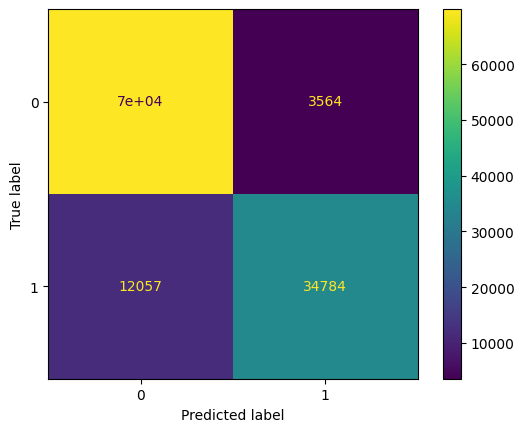

In [15]:
analysis(RandomForestClassifier, n_estimators=100)

#KNeighborsClassifier

F-Score: 0.8188954292131032
        Precision: 0.8471684784464781
        Re-call: 0.8072729637735185
        Accuracy: 0.8362667863316049
        Train Time: 0.06632527299998969
        Test Time: 170.194362362
        Confusion Matrix:
[[68951  4544]
 [15159 31682]]
              precision    recall  f1-score   support

           0       0.82      0.94      0.87     73495
           1       0.87      0.68      0.76     46841

    accuracy                           0.84    120336
   macro avg       0.85      0.81      0.82    120336
weighted avg       0.84      0.84      0.83    120336

False Alarm of 0: 0.3236

False Alarm of 1: 0.0618



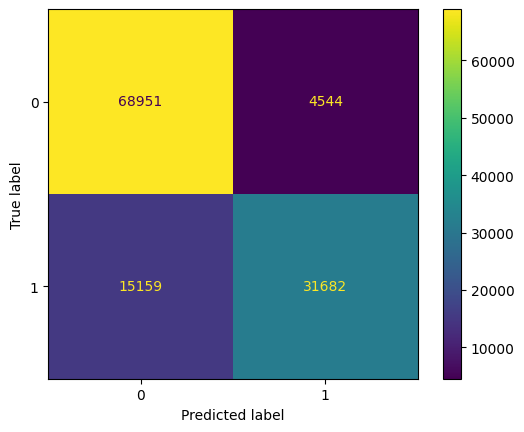

In [16]:
analysis(KNeighborsClassifier, n_neighbors = 5)

#DecisionTreeClassifier

F-Score: 0.8525231631264175
        Precision: 0.8723146883450952
        Re-call: 0.8422766967812139
        Accuracy: 0.864761999734078
        Train Time: 3.6559404469999777
        Test Time: 0.04735216799997488
        Confusion Matrix:
[[69364  4131]
 [12143 34698]]
              precision    recall  f1-score   support

           0       0.85      0.94      0.90     73495
           1       0.89      0.74      0.81     46841

    accuracy                           0.86    120336
   macro avg       0.87      0.84      0.85    120336
weighted avg       0.87      0.86      0.86    120336

False Alarm of 0: 0.2592

False Alarm of 1: 0.0562



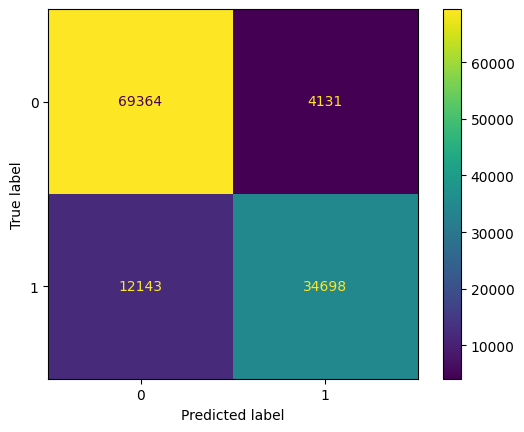

In [17]:
analysis(DecisionTreeClassifier, random_state=17)

#LinearDiscriminantAnalysis

F-Score: 0.5693258079571974
        Precision: 0.7679335748492481
        Re-call: 0.5985997051667041
        Accuracy: 0.6830541151442627
        Train Time: 0.9796819290000371
        Test Time: 0.018674126999997043
        Confusion Matrix:
[[72017  1478]
 [36662 10179]]
              precision    recall  f1-score   support

           0       0.66      0.98      0.79     73495
           1       0.87      0.22      0.35     46841

    accuracy                           0.68    120336
   macro avg       0.77      0.60      0.57    120336
weighted avg       0.74      0.68      0.62    120336

False Alarm of 0: 0.7827

False Alarm of 1: 0.0201



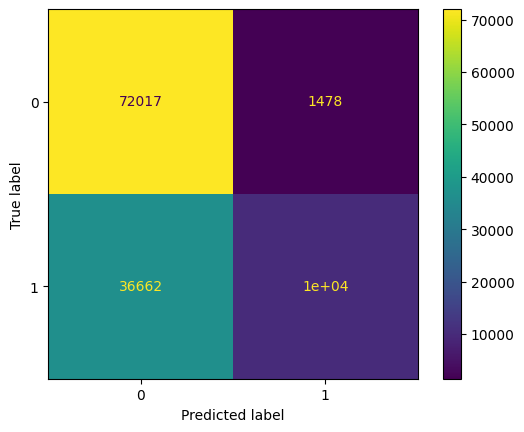

In [18]:
analysis(LinearDiscriminantAnalysis)

#MLPClassifier

F-Score: 0.7760760573564158
        Precision: 0.823393495914598
        Re-call: 0.7635828715166894
        Accuracy: 0.8031761069006781
        Train Time: 544.8145012580001
        Test Time: 0.8105302929999425
        Confusion Matrix:
[[69257  4238]
 [19447 27394]]
              precision    recall  f1-score   support

           0       0.78      0.94      0.85     73495
           1       0.87      0.58      0.70     46841

    accuracy                           0.80    120336
   macro avg       0.82      0.76      0.78    120336
weighted avg       0.81      0.80      0.79    120336

False Alarm of 0: 0.4152

False Alarm of 1: 0.0577



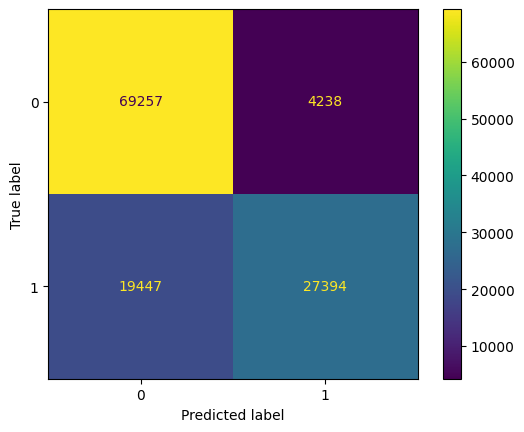

In [19]:
# 5-class classification version using MLPClassifier
analysis(MLPClassifier,
    hidden_layer_sizes=(64, 32),
    activation='relu',
    solver='adam',
    alpha=0.0001,
    max_iter=100,
    random_state=42
)

In [20]:
model_names = list(performance_metrics.keys())
accuracies = list(map(lambda x:x['accuracy'], performance_metrics.values()))
f1scores = list(map(lambda x:x['f1score'], performance_metrics.values()))
precisions = list(map(lambda x:x['precision'], performance_metrics.values()))
recalls = list(map(lambda x:x['recall'], performance_metrics.values()))
time = list(map(lambda x:x['time'], performance_metrics.values()))
models = list(map(lambda x:x, performance_metrics))
print(
  "\naccuracies", accuracies,
  "\nf1scores", f1scores,
  "\nprecisions", precisions,
  "\nrecalls", recalls,
  "\ntime", time,
  "\nmodels:", list(performance_metrics.keys())
)


accuracies [0.8701884722776226, 0.8362667863316049, 0.864761999734078, 0.6830541151442627, 0.8031761069006781] 
f1scores [0.8580818399878503, 0.8188954292131032, 0.8525231631264175, 0.5693258079571974, 0.7760760573564158] 
precisions [0.8800017699573138, 0.8471684784464781, 0.8723146883450952, 0.7679335748492481, 0.823393495914598] 
recalls [0.8470521012356231, 0.8072729637735185, 0.8422766967812139, 0.5985997051667041, 0.7635828715166894] 
time [80.185346336, 170.26068763499998, 3.7032926149999525, 0.9983560560000342, 545.625031551] 
models: ['RandomForestClassifier', 'KNeighborsClassifier', 'DecisionTreeClassifier', 'LinearDiscriminantAnalysis', 'MLPClassifier']


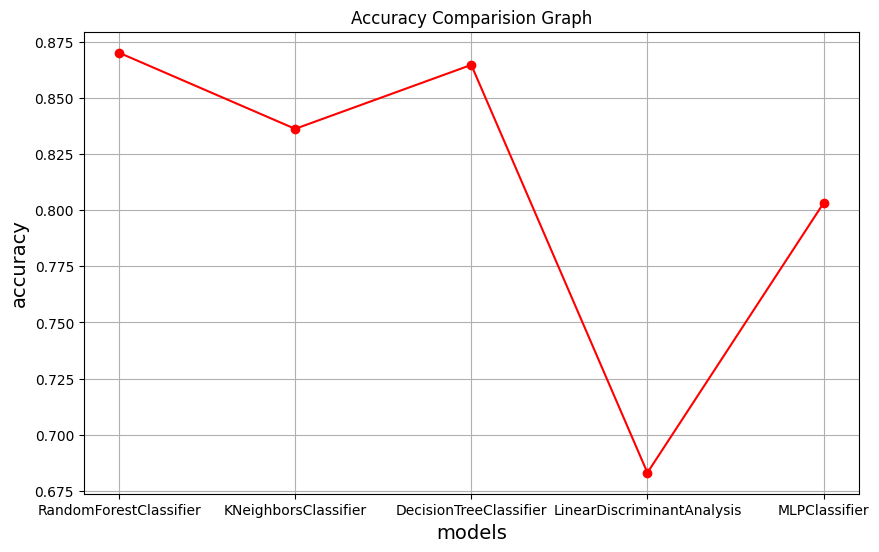

In [21]:
plt.figure(figsize=(10,6))
plt.plot(model_names, accuracies, color='red', marker='o')
plt.title('graph', fontsize=14)
plt.xlabel('models', fontsize=14)
plt.ylabel('accuracy', fontsize=14)
plt.title("Accuracy Comparision Graph")
plt.grid(True)
plt.show()

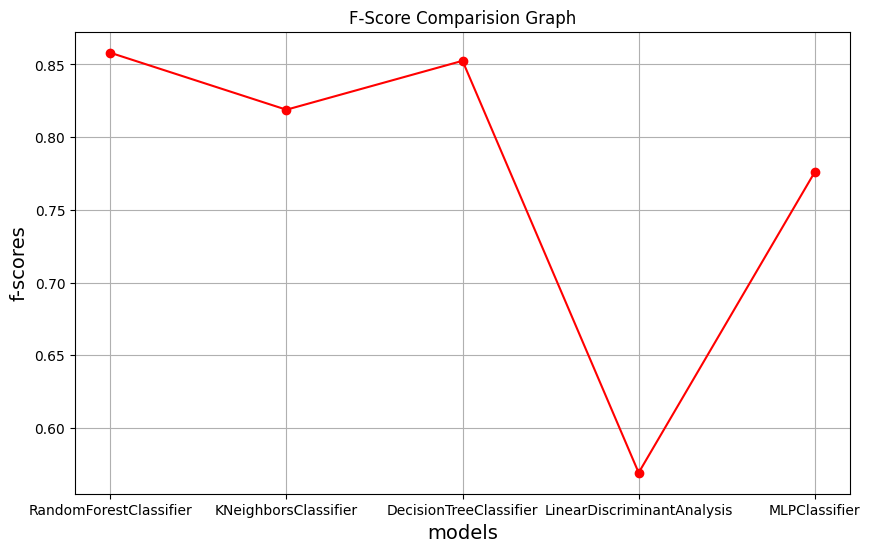

In [22]:
plt.figure(figsize=(10,6))
plt.plot(model_names, f1scores, color='red', marker='o')
plt.title('graph', fontsize=14)
plt.xlabel('models', fontsize=14)
plt.ylabel('f-scores', fontsize=14)
plt.title("F-Score Comparision Graph")
plt.grid(True)
plt.show()

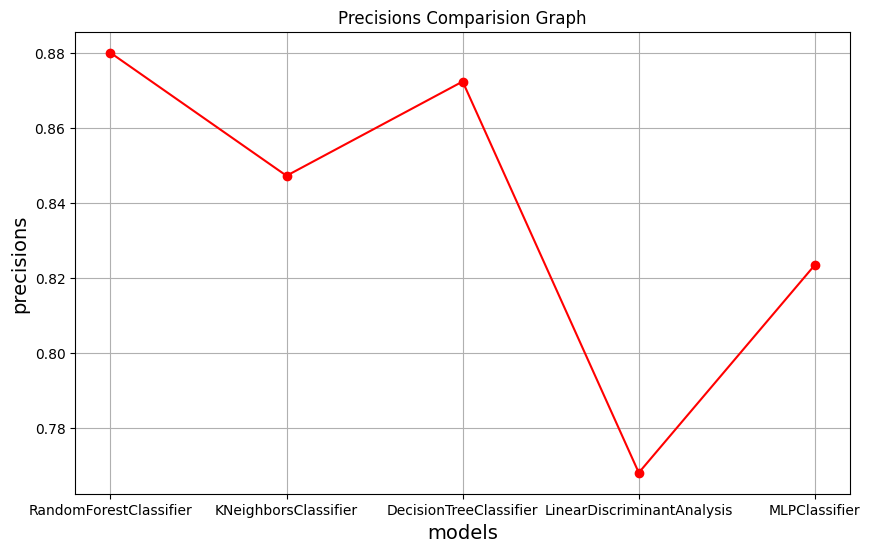

In [23]:
plt.figure(figsize=(10,6))
plt.plot(model_names, precisions, color='red', marker='o')
plt.title('graph', fontsize=14)
plt.xlabel('models', fontsize=14)
plt.ylabel('precisions', fontsize=14)
plt.title("Precisions Comparision Graph")
plt.grid(True)
plt.show()

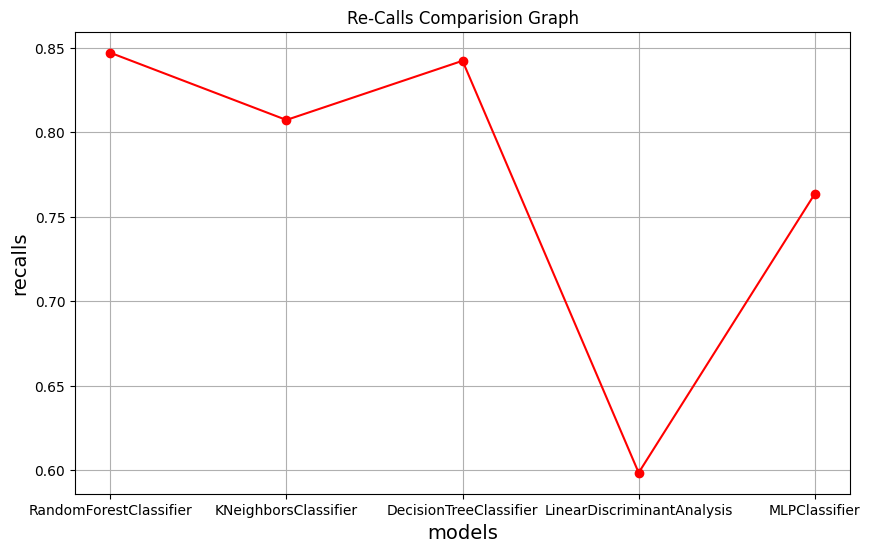

In [24]:
plt.figure(figsize=(10,6))
plt.plot(model_names, recalls, color='red', marker='o')
plt.title('graph', fontsize=14)
plt.xlabel('models', fontsize=14)
plt.ylabel('recalls', fontsize=14)
plt.title("Re-Calls Comparision Graph")
plt.grid(True)
plt.show()

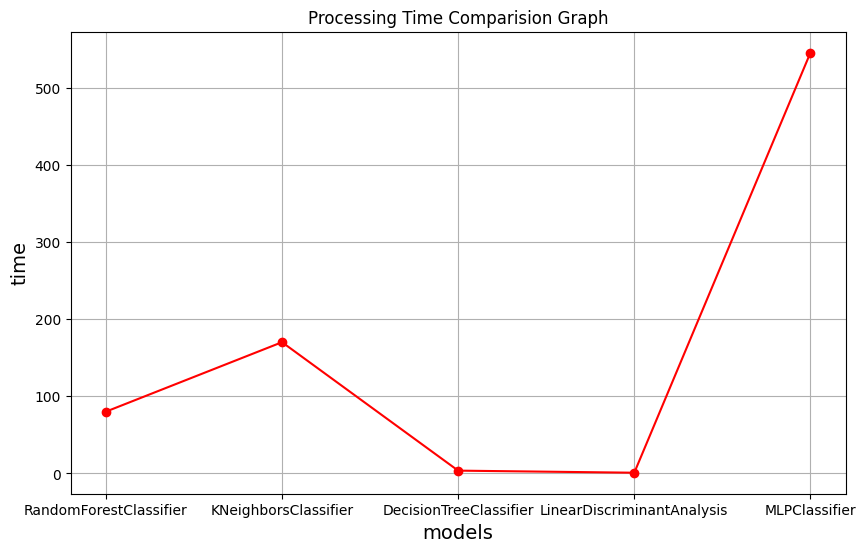

In [25]:
plt.figure(figsize=(10,6))
plt.plot(model_names, time, color='red', marker='o')
plt.title('graph', fontsize=14)
plt.xlabel('models', fontsize=14)
plt.ylabel('time', fontsize=14)
plt.title("Processing Time Comparision Graph")
plt.grid(True)
plt.show()

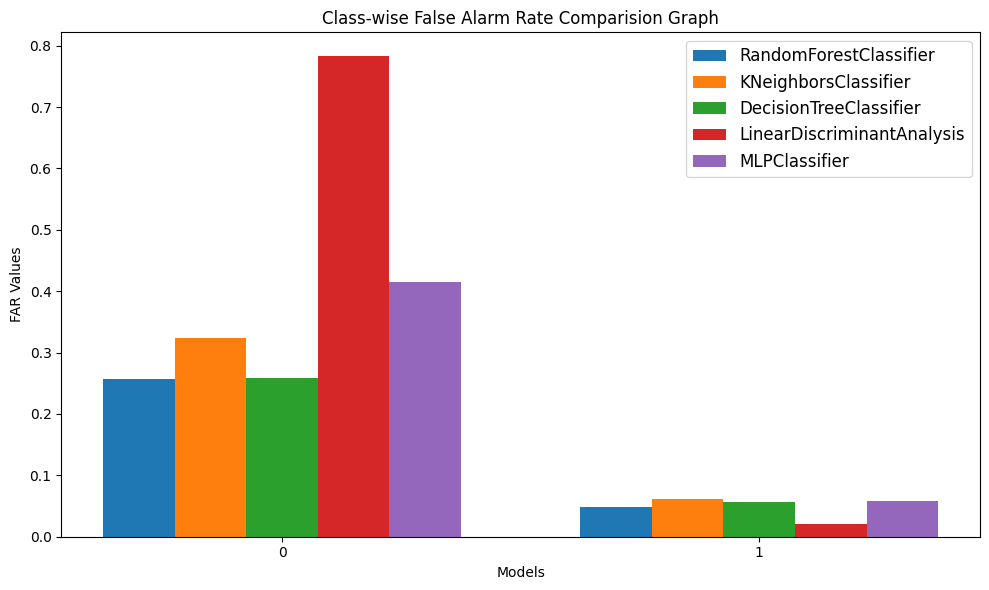

In [26]:
# categories = performance_metrics["A"]["class_FAR"].keys() # Categories is attack class
groups = performance_metrics.keys() # Group is your model name

# Define the width of the bars
bar_width = 0.15
plt.figure(figsize=(10,6))

# Create an array of equally spaced values for the x-axis
x = np.arange(len(label_names))

# Create the grouped bar chart
for i, model in enumerate(performance_metrics):
    plt.bar(x + i * bar_width, performance_metrics[model]["class_FAR"].values(), bar_width, label=model)

# Customize the chart
plt.xlabel('Models')
plt.ylabel('FAR Values')
plt.title('Class-wise False Alarm Rate Comparision Graph')
plt.xticks(x + bar_width * (len(groups) - 1) / 2, label_names)
plt.legend(fontsize=12)

# Display the chart
plt.tight_layout()
plt.show()

In [27]:
class_far_data = {key: value['class_FAR'] for key, value in performance_metrics.items()}

# Remove 'class_FAR' from the original data
for key in performance_metrics.keys():
    performance_metrics[key].pop('class_FAR')

# Convert the modified dictionary to a Pandas DataFrame
df = pd.DataFrame.from_dict(performance_metrics, orient='index')

# Convert the 'class_FAR' data to a separate Pandas DataFrame
df_class_far = pd.DataFrame.from_dict(class_far_data, orient='index')

# Display the two DataFrames
print("Table 1 - Main Data (Performance Metrics):")
print(df)
print("\nTable 2 - class_FAR Data:")
print(df_class_far)


Table 1 - Main Data (Performance Metrics):
                            accuracy   f1score  precision    recall  \
RandomForestClassifier      0.870188  0.858082   0.880002  0.847052   
KNeighborsClassifier        0.836267  0.818895   0.847168  0.807273   
DecisionTreeClassifier      0.864762  0.852523   0.872315  0.842277   
LinearDiscriminantAnalysis  0.683054  0.569326   0.767934  0.598600   
MLPClassifier               0.803176  0.776076   0.823393  0.763583   

                                  time  
RandomForestClassifier       80.185346  
KNeighborsClassifier        170.260688  
DecisionTreeClassifier        3.703293  
LinearDiscriminantAnalysis    0.998356  
MLPClassifier               545.625032  

Table 2 - class_FAR Data:
                                   0         1
RandomForestClassifier      0.257403  0.048493
KNeighborsClassifier        0.323627  0.061827
DecisionTreeClassifier      0.259239  0.056208
LinearDiscriminantAnalysis  0.782690  0.020110
MLPClassifier         